# Sección 2 - Proyecto (0) - Alejandro Molina (T1)

# Paso 1: Cargar y Visualizar el conjunto de datos iris de scikit-learn

### Líbrerias a utilizar:

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# load_iris es la funcion que nos permite cargar el dataset de iris
from sklearn.datasets import load_iris

# train_test_split es la funcion que nos permite dividir el dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# confusion_matrix es la funcion que nos permite crear la matriz de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# KNeighborsClassifier es la funcion que nos permite crear el modelo de KNN
from sklearn.neighbors import KNeighborsClassifier

### Cargamos los datos:

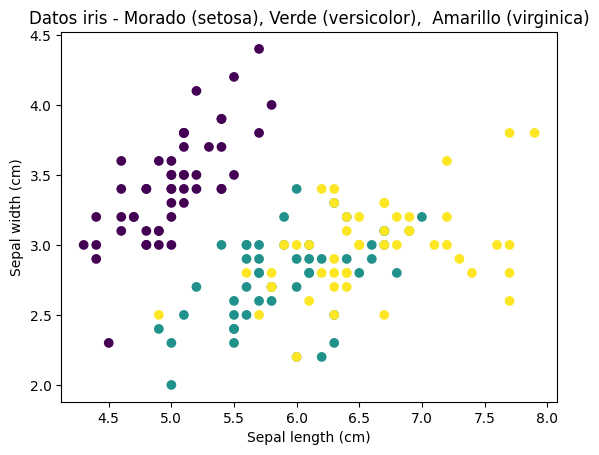

In [2]:
# Cargamos los datos iris
iris = load_iris()

# Las etiquetas de las clases son:
# 0: setosa
# 1: versicolor
# 2: virginica

# Visualizamos los datos
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
plt.title('Datos iris - Morado (setosa), Verde (versicolor),  Amarillo (virginica)')
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.show()


# Paso 2: Seleccion de caracteristicas: ”sepal length” y ”sepal width” para las especies: "setosa" and "versicolor"

In [3]:
# Filtramos los datos para las especies "setosa (0)" y "versicolor (1)"
irisFiltrada = iris.data[iris.target != 2]

X = irisFiltrada[:, :2] # Escogemos las primeras dos columnas de los datos (Sepal length y Sepal width)
Y = iris.target[iris.target != 2] # Escogemos las etiquetas de las especies (0 y 1)

# Dividimos los datos en entrenamiento y prueba
# test_size es el porcentaje de datos que se van a usar para prueba (en este caso 33%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.33)


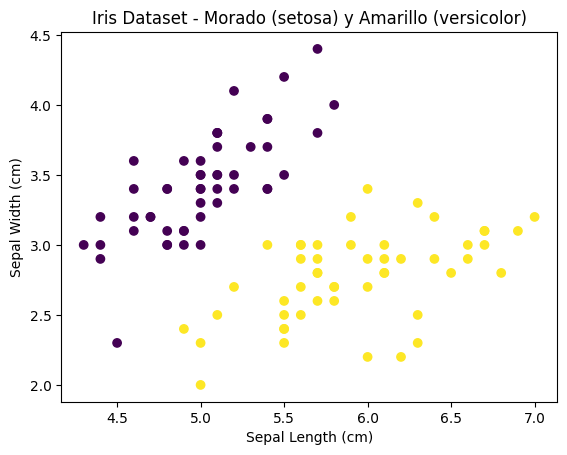

In [4]:
# Graficamos los datos
plt.scatter(X[:,0], X[:,1], c= Y) # C indica el color Morado es setosa y amarillo es versicolor
plt.title('Iris Dataset - Morado (setosa) y Amarillo (versicolor)') # Título del gráfico
plt.xlabel('Sepal Length (cm)') # Etiqueta eje X
plt.ylabel('Sepal Width (cm)') # Etiqueta eje Y
plt.show()

# Paso 3: Implementar un clasificador binario, basado en el algoritmo de los K vecinos mascercanos

### Formula de la distancia euclidiana: 
- distancia = √ ( ∑ ( xi - yi )^2 ) 

In [5]:
# Creamos una clase para manejar los datos 
class KNNClassifier: 

    # Inicializamos la clase con los datos de entrenamiento
    def __init__(self, k, X_train, Y_train):
        self.k = k
        self.X_train = X_train
        self.Y_train = Y_train

    # Calculamos la distancia euclidiana entre dos puntos
    def euclideanDistance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))
    
    # Función para predecir la etiqueta de los datos de prueba
    def predict(self, x_test):
        y_pred = []
        for i in x_test:
            # Calcular las distancias entre x_test y todos los puntos de entrenamiento
            # Y guardarlas en una lista
            distances = [self.euclideanDistance(i, x_train) for x_train in self.X_train]

            # Obtener los índices de los k vecinos más cercanos
            # Para ello se utiliza la función argsort de numpy, la cual devuelve los índices de los valores ordenados
            # Y con [:self.k] obtenemos los k primeros índices
            k_indices = np.argsort(distances)[:self.k]

            # Obtener las etiquetas de los k vecinos más cercanos
            nearest_k = [self.Y_train[i] for i in k_indices]
        
            # Debemos contar cuántas veces aparece cada etiqueta
            # Usando la libreria numpy podemos obtener los valores únicos y sus conteos (unique, counts)
            unique, counts = np.unique(nearest_k, return_counts=True)

            # Guardamos la etiqueta que más se repite, es decir, la etiqueta con mayor conteo
            y_pred.append(unique[np.argmax(counts)])

        return y_pred

### Ahora probaremos el algoritmo para predecir la especie de una flor

In [6]:
# Escogemos arbitrariamente un valor de k
k = 3

# Creamos una instancia de la clase KNNClassifier )
knn = KNNClassifier(k, X_train, Y_train)

# Predecimos la clase del nuevo punto
y_pred = knn.predict(X_test)

# Calculamos el error de clasificación
error = np.mean(y_pred != Y_test)

print("El error es de: ", error)


El error es de:  0.030303030303030304


# Paso 4: Optimizar K

### Para optimizar K usaremos una grafica de error de clasificacion

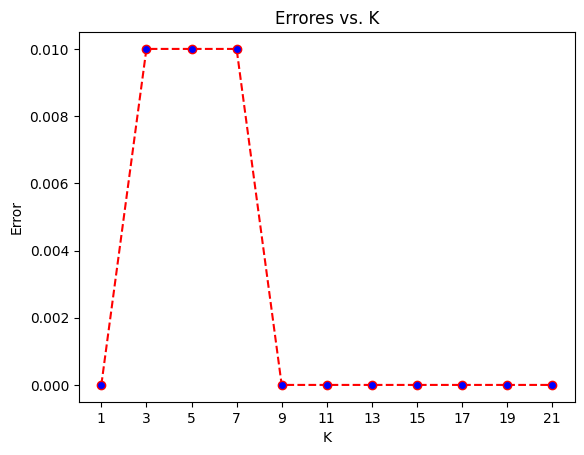

In [7]:
# Asignamos valores impares a K para evitar empates
K = range(1, 22, 2)

# Creamos un array para guardar los errores
errores = []

for i in K:
    # Creamos una instancia de la clase KNNClassifier
    knn = KNNClassifier(i, X, Y)
    
    # Predecimos la clase del nuevo punto
    y_pred = knn.predict(X)

    # Calculamos el error y lo agregamos al array
    errores.append(np.mean(y_pred != Y))

# Grafica de errores vs. K
plt.plot(K, errores, color='red', linestyle='dashed', marker='o', markerfacecolor='blue')
plt.title('Errores vs. K')
plt.xlabel('K')
plt.ylabel('Error')
plt.xticks(K)  # Seteamos los valores del eje x para que sean los valores de K
plt.show()

# Paso 5: Evaluar el desempeño del algoritmo, usando una matriz de confusión.

La matriz de confusión nos dira que tan bueno es nuestro algoritmo para clasificar las flores, en este caso, la matriz de confusión nos dira cuantas flores fueron clasificadas correctamente y cuantas fueron clasificadas incorrectamente.

Nota: En este caso la matriz sera 2x2, ya que solo tenemos 2 clases.

- La posción [0,0] es el número de predicciones correctas de la clase 0
- La posción [0,1] es el número de predicciones incorrectas de la clase 0
- La posción [1,0] es el número de predicciones incorrectas de la clase 1
- La posción [1,1] es el número de predicciones correctas de la clase 1

In [8]:
# Creamos una instancia de la clase KNNClassifier
knn = KNNClassifier(9, X_train, Y_train)

# Predecimos la clase del nuevo punto
y_pred = knn.predict(X_test)

# Mostramos la matriz de confusión 
print(confusion_matrix(Y_test, y_pred))

[[15  0]
 [ 0 18]]


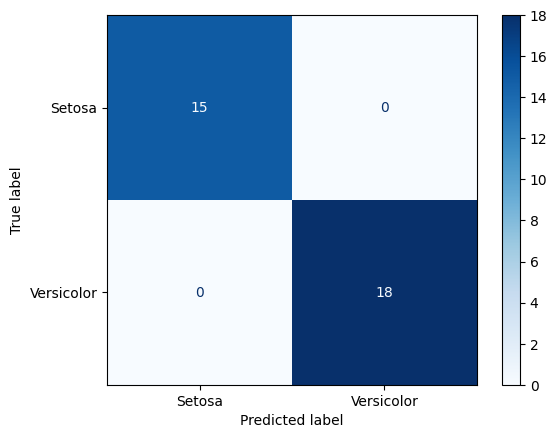

In [9]:
# Creamos una instancia de la clase ConfusionMatrixDisplay, la cual nos permite graficar la matriz de confusión.
display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test, y_pred), display_labels = ["Setosa", "Versicolor"])

# Graficamos la matriz de confusión
display.plot(cmap= "Blues")
plt.show()

# Paso 6: Usar un clasificador binario basado en K primeros vecinos de scikit-learn

- Utilizando de la libreria sklearn el algoritmo de K vecinos mas cercanos, se prueba el algoritmo con el mismo conjunto de datos.

### Utilizamos un valor optimo de K (9)

In [10]:
# Creamos una instancia de la clase KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)

# Entrenamos el modelo
knn.fit(X_train, Y_train)

# Predecimos la clase de los nuevos puntos
y_pred = knn.predict(X_test)

# Calculamos el error de clasificación
error = np.mean(y_pred != Y_test)

print("El error es de: ", error)

El error es de:  0.0


### Utilizamos un valor que no este optimo para comparar los resultados, K = 3

In [11]:
# Creamos una instancia de la clase KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Entrenamos el modelo
knn.fit(X_train, Y_train)

# Predecimos la clase de los nuevos puntos
y_pred = knn.predict(X_test)

# Calculamos el error de clasificación
error = np.mean(y_pred != Y_test)

print("El error es de: ", error)

El error es de:  0.030303030303030304
